<a href="https://colab.research.google.com/github/ranumip/CRM_CM_CW/blob/main/CRM%26CM_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TASK 1(a)
#LOAD S&P 500 TICKERS FROM WIKIPEDIA

# Import required libraries
import numpy as np
import pandas as pd
import pandas_datareader as dr

import requests

#Define the URL and create a HTTP header
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}

# Send the HTTP request to the URL
r = requests.get(sp500_url, headers=header)

# Read all HTML tables on the page into a list of DataFrames
tables = pd.read_html(r.text)

# The second table contains the current S&P 500 list
data_table = tables[1]

data_table.head()

/tmp/ipython-input-1427650460.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(r.text)


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
# 7. Extract just the 'Symbol' column
symbols = data_table["Symbol"]

# 8. Replace '.' with '-' because Yahoo Finance uses '-' instead of '.'
Symbols_clean = symbols.str.replace('.', '-', regex=False)

# 9. Convert the cleaned ticker codes to a Python list
tickers = Symbols_clean.tolist()

# 10. Print how many tickers we have
print("Number of tickers:", len(tickers))
print("First 10 tickers:", tickers[:10])


Number of tickers: 503
First 10 tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


In [ ]:
# TASK 1(b): DOWNLOAD DAILY MARKET DATA


# Install finance packages
import yfinance as yf
from datetime import datetime

# 1. Define start and end dates
start = '2022-01-01'
end   = '2025-01-01'

    # Download OHLCV data for this batch
batch_data = yf.download(
        tickers,
        start=start,
        end=end,
        auto_adjust=True,
        group_by="tickers",
        progress=False
    )

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


In [ ]:
batch_data.head()

Ticker     SOLV                             INCY                        \
Price      Open High Low Close Volume       Open       High        Low   
Date                                                                     
2022-01-03  NaN  NaN NaN   NaN    NaN  73.199997  74.059998  72.260002   
2022-01-04  NaN  NaN NaN   NaN    NaN  73.730003  73.750000  70.820000   
2022-01-05  NaN  NaN NaN   NaN    NaN  71.720001  72.820000  70.370003   
2022-01-06  NaN  NaN NaN   NaN    NaN  70.809998  72.690002  70.440002   
2022-01-07  NaN  NaN NaN   NaN    NaN  72.690002  74.449997  72.690002   

Ticker                          ...        AEE                        \
Price           Close   Volume  ...       Open       High        Low   
Date                            ...                                    
2022-01-03  73.970001  1391200  ...  79.719040  79.719040  78.057668   
2022-01-04  71.809998  2297400  ...  79.102717  79.897674  78.602521   
2022-01-05  70.449997  1597300  ...  78.700778  79.576121  78.414951   
2022-01-06  72.629997  1997700  ...  78.781166  79.361754  78.307765   
2022-01-07  73.190002  2531700  ...  78.272051  79.236720  77.950494   

Ticker                                 KO                                   \
Price           Close   Volume       Open       High        Low      Close   
Date                                                                         
2022-01-03  79.120590  1134800  52.567722  53.005639  52.174493  52.996700   
2022-01-04  78.700775   996900  53.380994  54.104896  53.255876  53.881470   
2022-01-05  78.897285  1135800  53.702725  54.694738  53.666976  54.328320   
2022-01-06  78.513206   865500  54.042339  54.623245  54.015526  54.042339   
2022-01-07  78.816910   822800  53.872518  54.265750  53.675905  53.917206   

Ticker                
Price         Volume  
Date                  
2022-01-03  20187300  
2022-01-04  26141600  
2022-01-05  22507300  
2022-01-06  17902300  
2022-01-07  12307900  

[5 rows x 2517 columns]

In [ ]:
# TASK 1(c): Identify and remove invalid data

clean_data = batch_data.dropna(axis=1, how='all')

In [ ]:
clean_data.head()

Ticker     SOLV                             INCY                        \
Price      Open High Low Close Volume       Open       High        Low   
Date                                                                     
2022-01-03  NaN  NaN NaN   NaN    NaN  73.199997  74.059998  72.260002   
2022-01-04  NaN  NaN NaN   NaN    NaN  73.730003  73.750000  70.820000   
2022-01-05  NaN  NaN NaN   NaN    NaN  71.720001  72.820000  70.370003   
2022-01-06  NaN  NaN NaN   NaN    NaN  70.809998  72.690002  70.440002   
2022-01-07  NaN  NaN NaN   NaN    NaN  72.690002  74.449997  72.690002   

Ticker                          ...        AEE                        \
Price           Close   Volume  ...       Open       High        Low   
Date                            ...                                    
2022-01-03  73.970001  1391200  ...  79.719040  79.719040  78.057668   
2022-01-04  71.809998  2297400  ...  79.102717  79.897674  78.602521   
2022-01-05  70.449997  1597300  ...  78.700778  79.576121  78.414951   
2022-01-06  72.629997  1997700  ...  78.781166  79.361754  78.307765   
2022-01-07  73.190002  2531700  ...  78.272051  79.236720  77.950494   

Ticker                                 KO                                   \
Price           Close   Volume       Open       High        Low      Close   
Date                                                                         
2022-01-03  79.120590  1134800  52.567722  53.005639  52.174493  52.996700   
2022-01-04  78.700775   996900  53.380994  54.104896  53.255876  53.881470   
2022-01-05  78.897285  1135800  53.702725  54.694738  53.666976  54.328320   
2022-01-06  78.513206   865500  54.042339  54.623245  54.015526  54.042339   
2022-01-07  78.816910   822800  53.872518  54.265750  53.675905  53.917206   

Ticker                
Price         Volume  
Date                  
2022-01-03  20187300  
2022-01-04  26141600  
2022-01-05  22507300  
2022-01-06  17902300  
2022-01-07  12307900  

[5 rows x 2505 columns]

In [ ]:
#TASK 2(a):
# Daily returns of the S&P 500 index (^GSPC)

import yfinance as yf
import numpy as np
import pandas as pd

# Download S&P 500 index (^GSPC) price data
sp500_data = yf.download(
    "^GSPC",
    start=start,
    end=end,
    auto_adjust=True
)

sp500_data['daily_return_market'] = sp500_data['Close'].pct_change(1)
sp500_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,daily_return_market
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000,NaN
2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000,-0.000630
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000,-0.019393
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000,-0.000964
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000,-0.004050


In [ ]:
stock_returns = clean_data

In [ ]:
stock_close_prices = clean_data.xs('Close', level='Price', axis=1)

stock_daily_returns = stock_close_prices.pct_change()

stock_daily_returns = stock_daily_returns.dropna(how="all")

stock_returns = stock_daily_returns.ffill().bfill()


In [ ]:
stock_returns.head()

Ticker,SOLV,INCY,IT,ED,DASH,LVS,WAB,ARE,ADSK,CBOE,...,MGM,KIM,MCD,HPQ,PODD,EG,TFC,TROW,AEE,KO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.0625,-0.029201,0.004504,-0.001880,-0.064882,-0.004891,0.058620,0.004504,-0.019491,-0.021252,...,-0.001979,0.026444,-0.000261,0.031036,-0.007798,0.000293,0.032285,0.002775,-0.005306,0.016695
2022-01-05,-0.0625,-0.018939,-0.062459,0.006826,-0.058421,-0.043715,-0.011771,-0.064170,-0.049858,-0.009862,...,-0.051773,-0.018629,-0.004916,-0.008418,-0.066167,-0.013267,-0.010906,-0.039155,0.002497,0.008293
2022-01-06,-0.0625,0.030944,0.009960,-0.002104,0.072751,0.023262,-0.001139,0.015437,-0.000795,0.007952,...,0.029740,0.006462,0.009357,-0.004888,0.019495,0.018793,0.037457,0.013548,-0.004868,-0.005264
2022-01-07,-0.0625,0.007710,-0.022336,0.003514,-0.036495,0.001850,-0.013895,-0.004003,-0.006777,-0.010440,...,0.004738,-0.006822,-0.009752,-0.000775,-0.039742,0.017717,0.015943,0.008209,0.003868,-0.002315
2022-01-10,-0.0625,0.020085,-0.019039,-0.010389,0.008921,-0.038786,-0.007150,-0.005646,0.000267,-0.012080,...,-0.020436,0.015354,-0.009923,0.008020,-0.037508,0.003690,0.004462,-0.012370,-0.008273,0.001658


In [ ]:
# TASK 2(b): Beta Calculation

import pandas as pd
import numpy as np

def betas_returns(sp500_data, stock_returns):
    """
    Calculate Beta for each stock using:
      Beta = corr(R_i, R_m) * (std(R_i) / std(R_m))
    where:
      R_i = stock daily returns
      R_m = market (^GSPC) daily returns
    """

    # Compute market daily returns from CLOSE prices
    if isinstance(sp500_data.columns, pd.MultiIndex):
        # MultiIndex case: ('Close','^GSPC')
        if ("Close", "^GSPC") in sp500_data.columns:
            market_prices = sp500_data[("Close", "^GSPC")]
        else:
            raise ValueError("Could not find ('Close','^GSPC') in sp500_data.")
    else:
        if "Close" in sp500_data.columns:
            market_prices = sp500_data["Close"]
        else:
            raise ValueError("Could not find 'Close' in sp500_data.")

    daily_return_market = market_prices.pct_change().dropna()
    market_daily_std = daily_return_market.std()

    # Loop over each stock and compute Beta
    beta_values = []
    tickers_list = stock_returns.columns

    for ticker in tickers_list:
        # stock i daily returns
        r_i = stock_returns[ticker].dropna()

        # align stock & market by date
        aligned = pd.concat([r_i, daily_return_market],
                            axis=1, join="inner").dropna()

        if aligned.empty:
            beta_values.append(np.nan)
            continue

        stock_ret = aligned.iloc[:, 0]
        market_ret = aligned.iloc[:, 1]

        corr = stock_ret.corr(market_ret)
        stock_daily_std = stock_ret.std()

        beta_cal = corr * (stock_daily_std / market_daily_std)
        beta_values.append(beta_cal)

    # Put results in DataFrame
    beta_cal_dataframe = pd.DataFrame({
        "Ticker_Names": tickers_list,
        "Beta_Values": beta_values
    }).set_index("Ticker_Names")

    return beta_cal_dataframe

# Call the function and inspect output
beta_daily_results = betas_returns(sp500_data, stock_returns)
display(beta_daily_results.head())


,Beta_Values
Ticker_Names,
SOLV,0.115219
INCY,0.517818
IT,1.104507
ED,0.320256
DASH,2.004918


In [ ]:
# TASK 2(c): ANNUAL VOLATILITY

# assuming ~252 trading days in a year.

#   stock_returns  -> daily returns for each stock (from Task 2(a))
#   beta_series    -> beta for each stock (from Task 2(b))

import numpy as np
import pandas as pd


daily_std = stock_returns.std()

TRADING_DAYS_PER_YEAR = 252

annual_volatility = daily_std * np.sqrt(TRADING_DAYS_PER_YEAR)
annual_volatility.name = "Annual Volatility"

print("Sample of Annual Volatility values:")
display(annual_volatility.head())



Sample of Annual Volatility values:


,Annual Volatility
Ticker,
SOLV,0.459397
INCY,0.271855
IT,0.285462
ED,0.189374
DASH,0.587645


In [ ]:
metrics_df = pd.concat([beta_daily_results, annual_volatility], axis=1)

print("Combined Beta + Annual Volatility (first 5 rows):")
display(metrics_df.head())

Combined Beta + Annual Volatility (first 5 rows):


,Beta_Values,Annual Volatility
SOLV,0.115219,0.459397
INCY,0.517818,0.271855
IT,1.104507,0.285462
ED,0.320256,0.189374
DASH,2.004918,0.587645


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Use ONLY Beta for Task 3 (drop missing)
beta_values = metrics_df[["Beta_Values"]].dropna()

# Scale Beta for clustering
scaler_agg = StandardScaler()
beta_scaled = scaler_agg.fit_transform(beta_values)


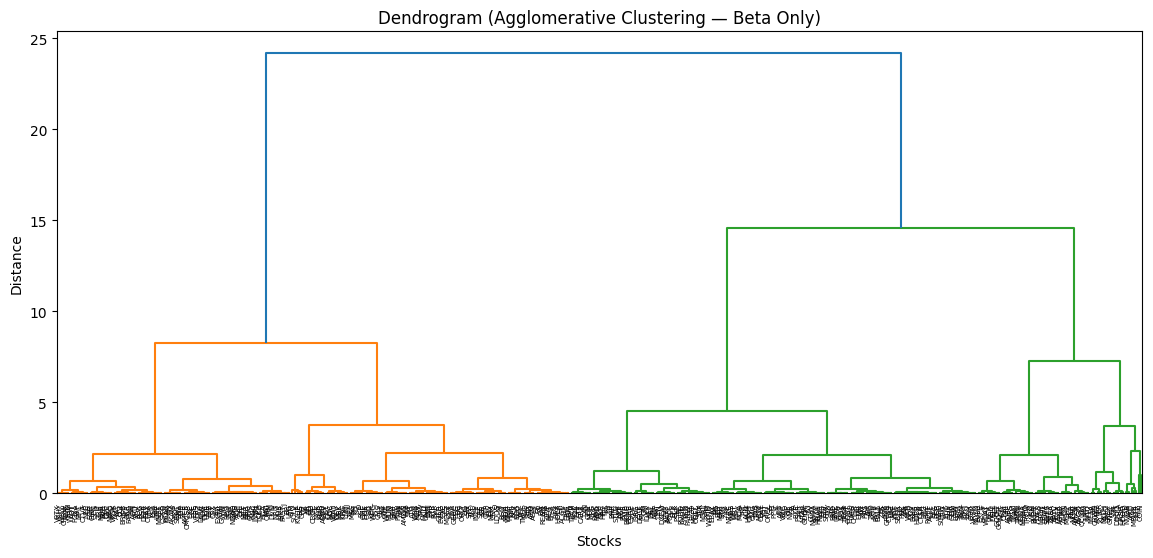

Chosen K from dendrogram (visual): 3


In [ ]:
# K from Dendrogram

plt.figure(figsize=(14, 6))

# Build hierarchical linkage matrix
link_matrix = linkage(beta_scaled, method="ward")

# Plot dendrogram
dendrogram(
    link_matrix,
    labels=beta_values.index,
    leaf_rotation=90
)

plt.title("Dendrogram (Agglomerative Clustering — Beta Only)")
plt.xlabel("Stocks")
plt.ylabel("Distance")

plt.show()

k_from_dendrogram = 3
print("Chosen K from dendrogram (visual):", k_from_dendrogram)


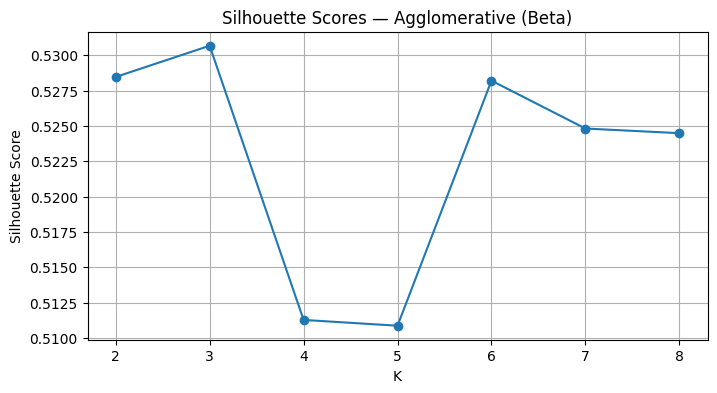

Best K from Silhouette Score: 3


In [ ]:
# K from Silhouette Score

range_k = range(2, 9)  # test K = 2…8
sil_scores_agg = []

for k in range_k:
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels = model.fit_predict(beta_scaled)
    sil = silhouette_score(beta_scaled, labels)
    sil_scores_agg.append(sil)

plt.figure(figsize=(8, 4))
plt.plot(range_k, sil_scores_agg, marker="o")
plt.title("Silhouette Scores — Agglomerative (Beta)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Best K = K with highest silhouette score
best_k_agg = range_k[np.argmax(sil_scores_agg)]
print("Best K from Silhouette Score:", best_k_agg)


In [ ]:
final_k_agg = best_k_agg

agg_final = AgglomerativeClustering(
    n_clusters=final_k_agg,
    linkage="ward"
)
agg_labels = agg_final.fit_predict(beta_scaled)
metrics_df.loc[beta_values.index, "Agg_Cluster"] = agg_labels


In [ ]:
# Show stocks with assigned Agglomerative clusters

assigned_stocks = (
    metrics_df[["Beta_Values", "Agg_Cluster"]]
    .dropna()
)

# Convert cluster labels to integers (remove decimals)
assigned_stocks["Agg_Cluster"] = assigned_stocks["Agg_Cluster"].astype(int)

# Sort by cluster then Beta
assigned_stocks = assigned_stocks.sort_values(["Agg_Cluster", "Beta_Values"])

assigned_stocks


,Beta_Values,Agg_Cluster
K,0.108994,0
SOLV,0.115219,0
GIS,0.133249,0
CPB,0.133666,0
KVUE,0.159122,0
...,...,...
GM,1.276012,2
DECK,1.279594,2
COF,1.291612,2
ISRG,1.301603,2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans_data = metrics_df[["Beta_Values", "Annual Volatility"]].dropna()

# Scale data
scaler_km = StandardScaler()
scaled_features = scaler_km.fit_transform(kmeans_data)

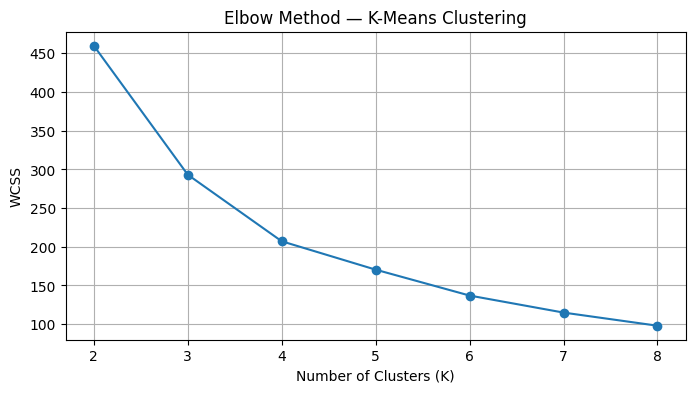

Best K selected from Elbow Method: 2


In [ ]:
wcss = []
range_k = range(2, 9)

for k in range_k:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range_k, wcss, marker="o")
plt.title("Elbow Method — K-Means Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

b_k_kmeans = range_k[np.argmax(wcss)]
print("Best K selected from Elbow Method:", b_k_kmeans)

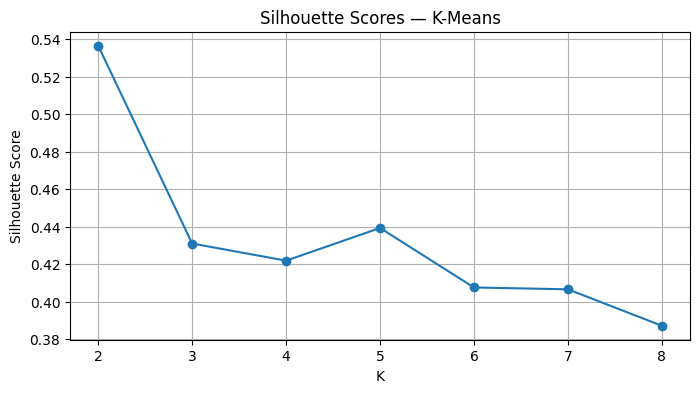

Best K selected from Silhouette Score: 2


In [ ]:
sil_scores = []

for k in range_k:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(scaled_features)
    sil = silhouette_score(scaled_features, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,4))
plt.plot(range_k, sil_scores, marker="o")
plt.title("Silhouette Scores — K-Means")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k_kmeans = range_k[np.argmax(sil_scores)]
print("Best K selected from Silhouette Score:", best_k_kmeans)

In [ ]:
final_k = best_k_kmeans

final_kmeans = KMeans(n_clusters=final_k, n_init=10, random_state=42)
kmeans_labels = final_kmeans.fit_predict(scaled_features)

# Attach cluster labels
metrics_df.loc[kmeans_data.index, "KMeans_Cluster"] = kmeans_labels.astype(int)

In [ ]:
cluster_profile = (
    metrics_df
    .groupby("KMeans_Cluster")[["Beta_Values", "Annual Volatility"]]
    .agg(["mean", "min", "max", "count"])
)

print("\nCluster Profile (K-Means using Beta + Volatility):")
print(cluster_profile)


Cluster Profile (K-Means using Beta + Volatility):
               Beta_Values                           Annual Volatility  \
                      mean       min       max count              mean   
KMeans_Cluster                                                           
0.0               0.753605  0.108994  1.248329   381          0.268417   
1.0               1.473406  0.837305  2.960959   120          0.448028   

                                          
                     min       max count  
KMeans_Cluster                            
0.0             0.156193  0.481664   381  
1.0             0.318058  0.953848   120  


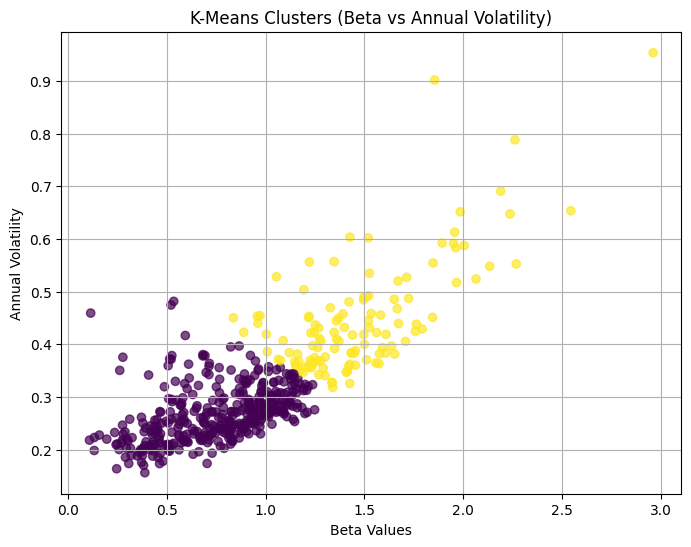

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    kmeans_data["Beta_Values"],
    kmeans_data["Annual Volatility"],
    c=kmeans_labels,
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Beta Values")
plt.ylabel("Annual Volatility")
plt.title("K-Means Clusters (Beta vs Annual Volatility)")
plt.grid(True)
plt.show()

In [ ]:
# Assign each stock to its K-Means cluster (clean + sorted)

assigned_kmeans = (
    metrics_df[["Beta_Values", "Annual Volatility", "KMeans_Cluster"]]
    .dropna()
)

# Convert cluster labels to integers (0,1,2,...)
assigned_kmeans["KMeans_Cluster"] = assigned_kmeans["KMeans_Cluster"].astype(int)

# Sort stocks by cluster → then Beta for clean viewing
assigned_kmeans = assigned_kmeans.sort_values(
    ["KMeans_Cluster", "Beta_Values"],
    ascending=[True, True]
)

assigned_kmeans


,Beta_Values,Annual Volatility,KMeans_Cluster
K,0.108994,0.218081,0
SOLV,0.115219,0.459397,0
GIS,0.133249,0.198433,0
CPB,0.133666,0.223119,0
KVUE,0.159122,0.227727,0
...,...,...,...
TTD,2.237123,0.647665,1
APP,2.261933,0.788374,1
NVDA,2.268516,0.552710,1
XYZ,2.544784,0.653825,1


Sample of metrics + average daily return:


,Beta_Values,Annual Volatility,Agg_Cluster,KMeans_Cluster,Avg_Daily_Return
SOLV,0.115219,0.459397,0.0,0.0,-0.046659
INCY,0.517818,0.271855,0.0,0.0,0.000055
IT,1.104507,0.285462,2.0,0.0,0.000704
ED,0.320256,0.189374,0.0,0.0,0.000273
DASH,2.004918,0.587645,1.0,1.0,0.000875



Business summary per K-Means cluster (mean values):


,Beta_Values,Annual Volatility,Avg_Daily_Return
KMeans_Cluster,,,
0.0,0.753605,0.268417,0.000189
1.0,1.473406,0.448028,0.000580


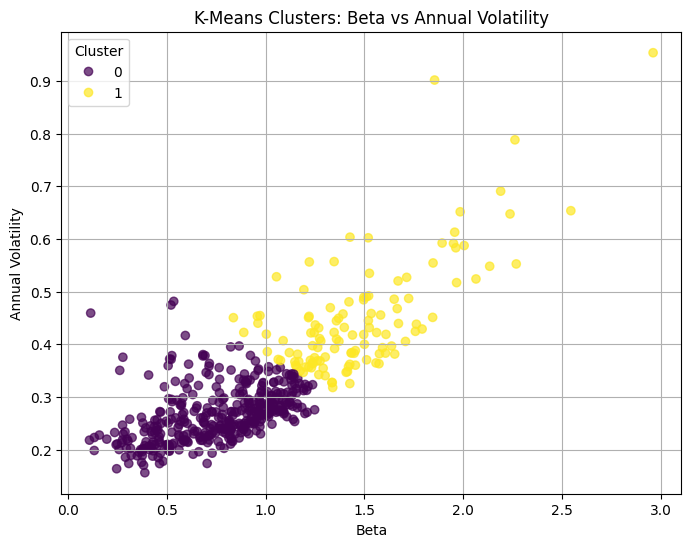

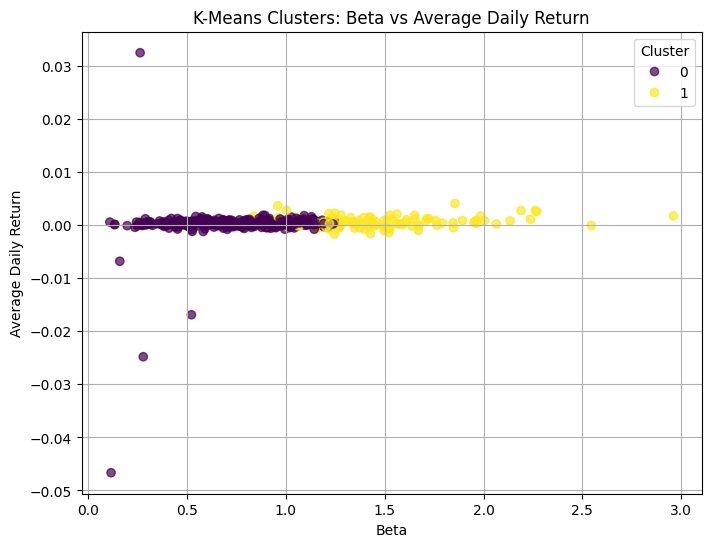

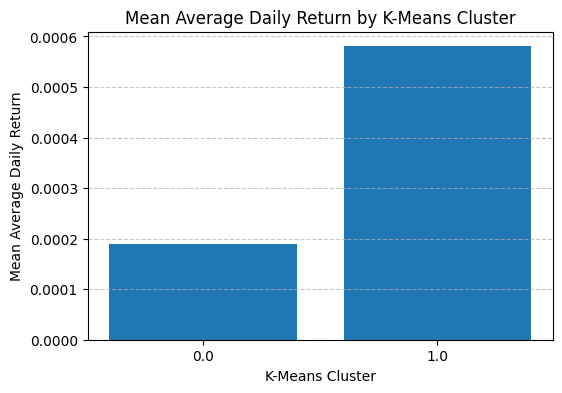

In [57]:
#Task 05
# Business value visualisations for investors
# Using Daily Return, Beta and Annual Volatility

import numpy as np
import matplotlib.pyplot as plt

# stock_returns: daily % returns per ticker
avg_daily_return = stock_returns.mean()          # mean over time for each stock
avg_daily_return.name = "Avg_Daily_Return"

# Join with metrics_df (which already has Beta, Volatility, clusters)
metrics_with_returns = metrics_df.join(avg_daily_return, how="inner")

print("Sample of metrics + average daily return:")
display(metrics_with_returns.head())

# Business summary by K-Means cluster
# We focus on K-Means clusters because they use BOTH Beta & Volatility
kmeans_business_summary = (
    metrics_with_returns
    .groupby("KMeans_Cluster")[["Beta_Values", "Annual Volatility", "Avg_Daily_Return"]]
    .mean()
)

print("\nBusiness summary per K-Means cluster (mean values):")
display(kmeans_business_summary)


# Visual 1: Risk–Risk plot
kmeans_data = metrics_with_returns.dropna(subset=["Beta_Values", "Annual Volatility", "KMeans_Cluster"])

plt.figure(figsize=(8, 6))
scatter1 = plt.scatter(
    kmeans_data["Beta_Values"],
    kmeans_data["Annual Volatility"],
    c=kmeans_data["KMeans_Cluster"],
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("K-Means Clusters: Beta vs Annual Volatility")
plt.grid(True)
plt.legend(*scatter1.legend_elements(), title="Cluster")
plt.show()

# Visual 2: Risk–Return plot

kmeans_rr_data = metrics_with_returns.dropna(subset=["Beta_Values", "Avg_Daily_Return", "KMeans_Cluster"])

plt.figure(figsize=(8, 6))
scatter2 = plt.scatter(
    kmeans_rr_data["Beta_Values"],
    kmeans_rr_data["Avg_Daily_Return"],
    c=kmeans_rr_data["KMeans_Cluster"],
    cmap="viridis",
    alpha=0.7
)
plt.xlabel("Beta")
plt.ylabel("Average Daily Return")
plt.title("K-Means Clusters: Beta vs Average Daily Return")
plt.grid(True)
plt.legend(*scatter2.legend_elements(), title="Cluster")
plt.show()

# Visual 3: Bar chart of mean Daily Return per cluster

plt.figure(figsize=(6, 4))
plt.bar(
    kmeans_business_summary.index.astype(str),
    kmeans_business_summary["Avg_Daily_Return"]
)
plt.xlabel("K-Means Cluster")
plt.ylabel("Mean Average Daily Return")
plt.title("Mean Average Daily Return by K-Means Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
